<a href="https://colab.research.google.com/github/ChabiMax/author_network/blob/main/Main%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import requests as req
import networkx as nx
import numpy as np
from tqdm import *
import matplotlib.pyplot as plt
import seaborn as sns

git_url = "https://raw.githubusercontent.com/ChabiMax/author_network/main/Data/"

edge_table = pd.read_csv(git_url + 'edge_table.csv')
node_table = pd.read_csv(git_url + 'node_table.csv')


In [39]:
# Year subsets and building metrics

node_table['date_naissance'] = pd.to_numeric(node_table['date_naissance'])
node_table['date_mort'] = pd.to_numeric(node_table['date_mort'], errors='coerce')
node_table = node_table.dropna()

measure_list = {}
for année in tqdm_notebook(reversed(range(1000, 2025, 5))) :
  BOOL = (node_table.date_naissance + 15 < année) & (node_table.date_mort > année) & (node_table.date_naissance + 70 > année)
  id_subset = list(node_table[BOOL]['Id'])
  if len(id_subset) > 10 :
    try :
      edge_table_subset = edge_table[edge_table['source'].isin(id_subset) & edge_table['target'].isin(id_subset)]
      graph = nx.from_pandas_edgelist(edge_table_subset, source = 'source', target = 'target')
      directed_graph = nx.from_pandas_edgelist(edge_table_subset, source = 'source', target = 'target', create_using=nx.DiGraph())
      graph_connected_components = sorted(nx.connected_components(graph), key=len, reverse=True)
      graph_giant = graph.subgraph(graph_connected_components[0])
      measure_list[année] = {'graph_size' : graph.number_of_nodes(),
                             'graph_giant_size' : graph_giant.number_of_nodes(),
                             'density_directed' : nx.density(directed_graph), 
                             'density_undirected' : nx.density(graph),
                             'density_giant' : nx.density(graph_giant),
                             'average_clustering' : nx.average_clustering(graph_giant),
                             'transitivity' : nx.transitivity(graph)}
    except : 
      pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


0it [00:00, ?it/s]

In [40]:
annee_data = pd.DataFrame(measure_list).T
annee_data['annee'] = annee_data.index

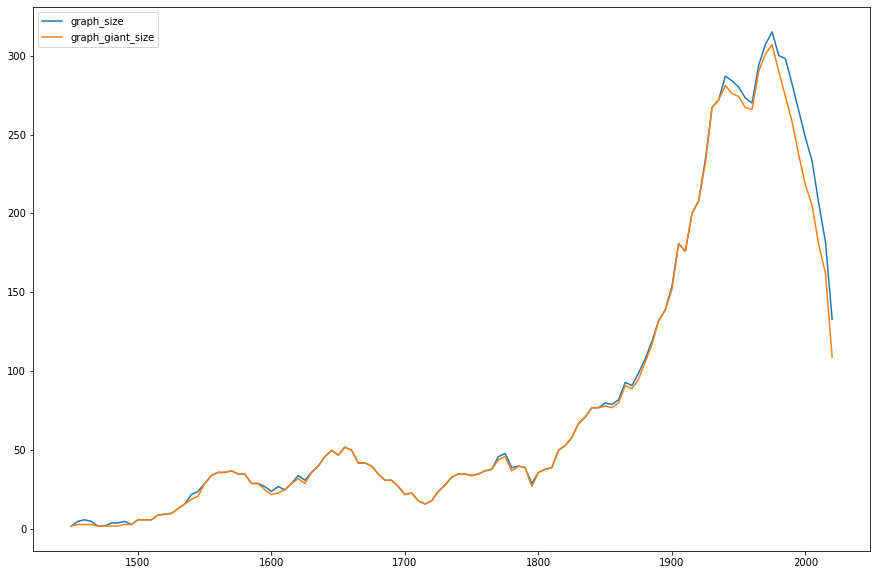

In [41]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['graph_size'], label = 'graph_size')
plt.plot(annee_data['annee'], annee_data['graph_giant_size'], label = 'graph_giant_size')
plt.legend()
plt.show()


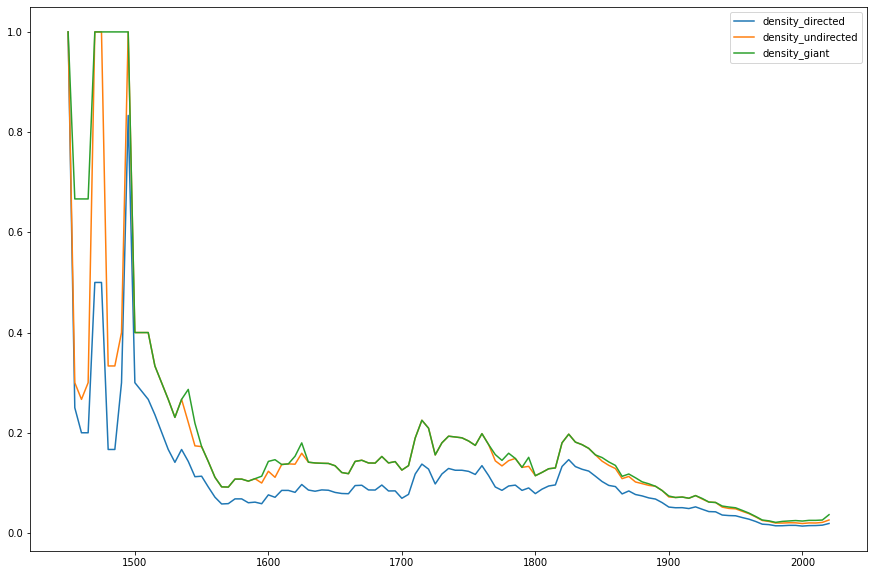

In [42]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['density_directed'], label = 'density_directed')
plt.plot(annee_data['annee'], annee_data['density_undirected'], label = 'density_undirected')
plt.plot(annee_data['annee'], annee_data['density_giant'], label = 'density_giant')
plt.legend()
plt.show()


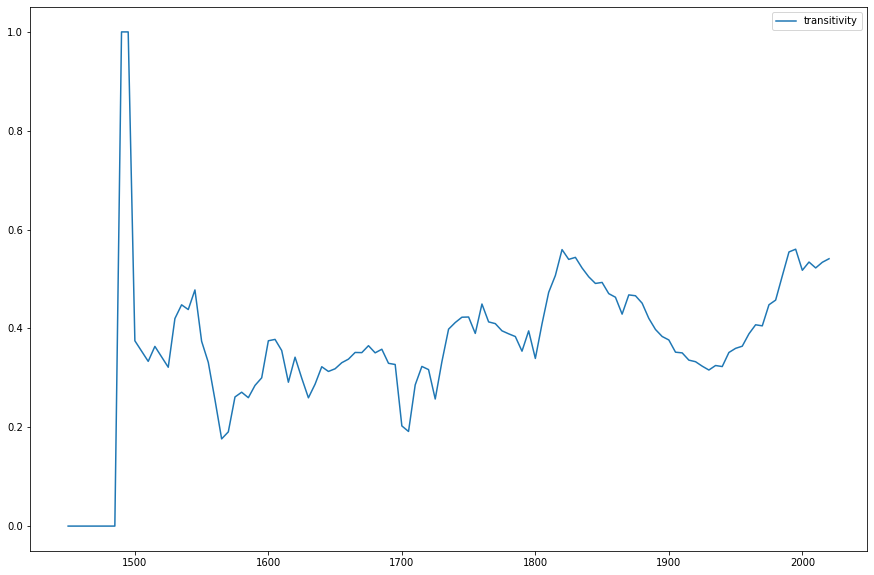

In [43]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['transitivity'], label = 'transitivity')
plt.legend()
plt.show()


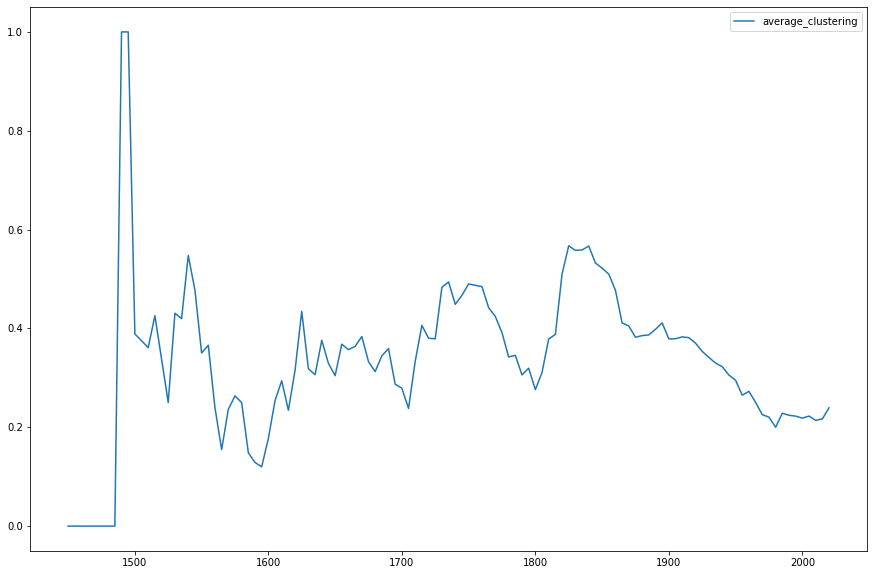

In [44]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(annee_data['annee'], annee_data['average_clustering'], label = 'average_clustering')
plt.legend()
plt.show()


In [ ]:

node_table['date_naissance'] = pd.to_numeric(node_table['date_naissance'])
node_table['date_mort'] = pd.to_numeric(node_table['date_mort'], errors='coerce')
node_table = node_table.dropna()

# Two year subset for 2D mapping

clustering_list = {}
transitivity_list = {}
for année in tqdm_notebook(reversed(range(1500, 2025, 10))) :
  BOOL = (node_table.date_naissance + 15 < année) & (node_table.date_mort > année) & (node_table.date_naissance + 70 > année)
  id_subset = list(node_table[BOOL]['Id'])
  temp_list = {}
  if len(id_subset) > 10 :
    for année_bis in range(1500, 2025, 10) :  
      BOOL_bis = (node_table.date_naissance + 15 < année_bis) & (node_table.date_mort > année_bis) & (node_table.date_naissance + 70 > année_bis)
      id_subset_bis = list(node_table[BOOL_bis]['Id'])
      if len(id_subset_bis) > 10 :
        try :
          
          edge_table_subset = edge_table[edge_table['source'].isin(id_subset) & edge_table['target'].isin(id_subset)]
          edge_table_subset_bis = edge_table[edge_table['source'].isin(id_subset_bis) & edge_table['target'].isin(id_subset_bis)]
          edge_table_subset_merged = edge_table[edge_table['source'].isin(id_subset + id_subset_bis) & edge_table['target'].isin(id_subset + id_subset_bis)]

          graph = nx.from_pandas_edgelist(edge_table_subset, source = 'source', target = 'target')
          #directed_graph = nx.from_pandas_edgelist(edge_table_subset, source = 'source', target = 'target', create_using=nx.DiGraph())
          graph_connected_components = sorted(nx.connected_components(graph), key=len, reverse=True)
          graph_giant = graph.subgraph(graph_connected_components[0])

          graph_bis = nx.from_pandas_edgelist(edge_table[edge_table['source'].isin(id_subset_bis)], source = 'source', target = 'target')
          # directed_graph_bis = nx.from_pandas_edgelist(edge_table[edge_table['source'].isin(id_subset_bis)], source = 'source', target = 'target', create_using=nx.DiGraph())
          graph_bis_connected_components = sorted(nx.connected_components(graph_bis), key=len, reverse=True)
          graph_bis_giant = graph_bis.subgraph(graph_bis_connected_components[0])

          graph_merged = nx.from_pandas_edgelist(edge_table_subset_merged, source = 'source', target = 'target')
          #directed_graph_merged = nx.from_pandas_edgelist(edge_table_subset_merged, source = 'source', target = 'target', create_using=nx.DiGraph())
          graph_merged_connected_components = sorted(nx.connected_components(graph_merged), key=len, reverse=True)
          graph_merged_giant = graph_merged.subgraph(graph_merged_connected_components[0])
          
          giant_clustering = nx.average_clustering(graph_giant)
          giant_bis_clustering = nx.average_clustering(graph_bis_giant)
          if (giant_clustering + giant_bis_clustering) > 0.1 :
            clustering = (nx.average_clustering(graph_merged_giant) - giant_clustering) / (giant_clustering + giant_bis_clustering)
            temp_list[str(année_bis) + '_bis'] = clustering

        except : 
          pass

  clustering_list[str(année) + '_bis'] = temp_list
  #transitivity_list[année] = temp_list


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


0it [00:00, ?it/s]

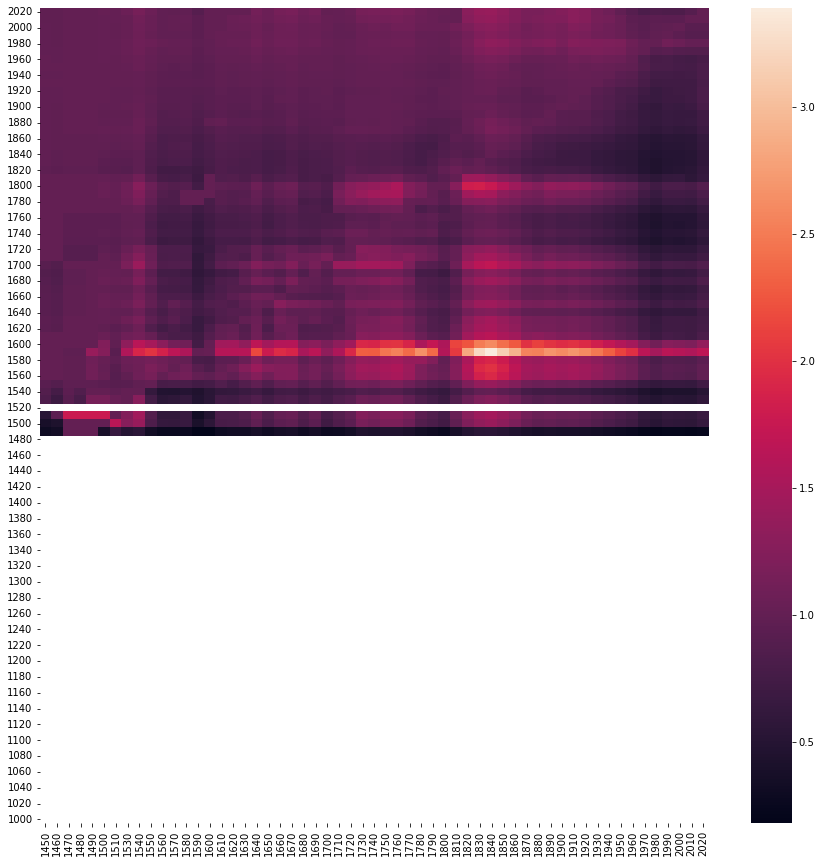

In [10]:
plt.rcParams['figure.figsize'] = [15, 15]
clustering_data = pd.DataFrame(clustering_list).T
sns.heatmap(clustering_data)
